Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). If you do not run a specific cell, you will not receive credit for that question. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Grading Guidelines
This homework is graded based on the total number of correct answers. Each question receives 1 or 2 points. 1 point questions receive full credit if answered correctly. Otherwise they receive 0 points. 2 point questions receive full credit if answered correctly. If students make progress on the question but don’t answer correctly they receive 1 point. Otherwise they receive 0 points.

If you do not run the cell, you will not receive credit for that question. Please make sure to run all cells before you submit.

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 3: Exploratory Data Analysis

-------------------------------------------

Welcome to your third lab of the semester!<br>

This lab aims to get you started with exploratory data analysis, including using `.count`, `.groupby`, understanding different file types, and basic plotting functions. 

In addition, we will introduce you to Geopandas, a Python package designed to work with geospatial data. 

The data for this lab comes from the State of California's [domestic well groundwater monitoring program](https://data.ca.gov/dataset/ground-water-water-quality-results). In California, up to [2 million people get their water from a private domestic well](https://www.waterboards.ca.gov/gama/docs/wellowner_guide.pdf) rather than the public water system. For this lab, we've taken the water monitoring dataset and made some modifications for educational purposes, including creating a Point object from the latitude and longitude columns in the raw data, and splitting the dataset to merge later.

## Geospatial Data

A common machine learning application is to predict an outcome at different locations. For example, we might be interested in predicting air or water pollutant levels in unmonitored locations, given sensor readings from other locations. Or, we might want to subset a dataset so that we can analyze only those data falling within a particular boundary, such as a country, city, or watershed. 

For these applications, we use geospatial data. Simply, geospatial data is data in the which the records are associated with a geographic location, e.g., coordinates, addresses, or zip codes. Most geospatial data comes in one of two formats: vector data or raster data.

### Vector data
Vector data represent geographic features as shapes (most commonly, points, lines, and/or polygons). Each shape is associated with coordinates in space: a point will be associated with one set of coordinates, whereas lines and polygons will be associated with a set of points that comprise the line or the boundary of the polygon. 

<img src="images/vector.png"><br>

### Raster data
Raster data are represented as a continuous grid of values (like pixels in a photograph). Grid cells are organized into rows and columns, representing x and y coordinates. The value of the cell represents an attribute such as solar insolation, land cover, temperature, etc. 

<img src="images/raster.png"><br>

Source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Raster_vector_tikz.png)

In this lab, we'll work with vector data.

## GeoPandas and related Geospatial Packages

[GeoPandas](http://geopandas.org/) is the go-to package for working with vector data in Python. `GeoPandas` provides convenient, unified access to the functionality of the [pandas](https://pandas.pydata.org/) package, extending it with the geospatial processing capabilities provided by a number of lower level spatial data packages including [shapely](https://pypi.python.org/pypi/Shapely) for geometry processing, [fiona](https://pypi.python.org/pypi/Fiona) and [GDAL/Ogr](https://gdal.org) for spatial data file IO, and[ pyproj](https://github.com/jswhit/pyproj) and [PROJ.4](https://proj.org/) for map projections and coordinate systems.  

## Setup

Begin by importing our usual packages: NumPy, Pandas, and matplotlib. We will also import GeoPandas using the common shorthand `gpd`.

In [2]:
# Run this cell to import the packages we will need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
%matplotlib inline

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Let's go ahead and load the data. The first dataset, `gama_measurements`, is saved as a csv file, so we can load it into a Pandas dataframe using the following code.

In [3]:
measurements = pd.read_csv('data/gama_measurements.csv')
measurements.head()

,WELL_ID,RESULTS,CHEMICAL,DATE,UNITS,QUALIFER,RL
0,ANT-07,0.073,BR,1/29/2008,MG/L,NaN,0.02
1,ANT-07,0.100,CDS,1/29/2008,UG/L,<,0.06
2,ANT-07,0.060,DCA12,1/29/2008,UG/L,<,0.06
3,ANT-07,2.000,I,1/29/2008,UG/L,<,0.002
4,ANT-07,6.790,MO,1/29/2008,UG/L,NaN,0.2


### Importing geospatial data
Geospatial data can be found in different formats and sources, such as ESRI Shapefiles, GeoJSON files, geopackage files, and PostGIS (PostgreSQL) databases, among others.

GeoPandas makes it easy to read in a variety of spatial data files, including the ESRI Shapefile, with the `read_file` command. The second dataset, `gama_wells` is an ESRI Shapefile. Load it into a **GeoDataFrame** using the following code.

In [4]:
# run this cell
wells = gpd.read_file('data/gama_wells.shp')
wells.head()

,WELL_ID,WELL_TYPE,WELL_DEPTH,TOP_OF_SCR,SCREEN_LEN,SOURCE,SOURCE_NAM,OTHER_NAME,geometry
0,ANT-07,MUNICIPAL,527.0,0.0,0.0,USGS,ANT-07,ANT-07,POINT (-118.21583 34.83500)
1,ANT-U,MUNICIPAL,700.0,235.0,458.0,USGS,ANT-U,ANT-U,POINT (-118.13369 34.69013)
2,ANT-08,MUNICIPAL,500.0,0.0,0.0,USGS,ANT-08,ANT-08,POINT (-118.29250 34.71942)
3,ANT-12,MUNICIPAL,1200.0,0.0,0.0,USGS,ANT-12,ANT-12,POINT (-118.07281 34.66450)
4,ANT-17,MUNICIPAL,552.0,0.0,0.0,USGS,ANT-17,ANT-17,POINT (-118.13714 34.68887)


## Question 1: Exploring the data

## Structure
### Question 1.1 
Take a look inside the `data` folder for this Lab. 

**Question 1.1.a (1 pt):** What file type holds the `gama_measurements` data? How is the information stored in this file (you can inspect the files in a text editor to answer this question)?

*YOUR ANSWER HERE*

*SOLUTION*


*The `gama_measurements` data is stored as a comma separated file; each new entry in a given row is separated by a comma.*

**Question 1.1.b. (1 pt):** How many file types are associated with `gama_wells`? What do the various extensions stand for? Why are multiple file types associated with this dataset? (Hint: refer to the [Library of Congress's description of the Shapefile format](https://www.loc.gov/preservation/digital/formats/fdd/fdd000280.shtml)). 

*YOUR ANSWER HERE*

*SOLUTION*

*The `gama_wells` data is stored as a Shapefile. Shapefiles consist of a cluster of files, at a minimum, the .shp (main file), .shx (index file), and dbf (dBASE table file) files. In this case the `gama_wells` data also includes a .prj (projection definition) and a .cpg (codepage) file.*

## Granularity

### Question 1.2

**Question 1.2.a (1 pt):** How many rows are in `wells`, and what do they represent? How many rows are in `measurements`, and what do they represent?

In [4]:
# scratch work here

*YOUR ANSWER HERE*

In [5]:
# Solution scratch work
print(wells.shape)
print(measurements.shape)

(4034, 9)
(522615, 7)


*SOLUTION*

*There are 4,034 rows in `wells`, each representing an individual well and its associated characteristics. There are 522,615 rows of `measurements`, each representing a well testing measurement that's specific to a well, date, and chemical substance.*

**Question 1.2.b (1 pt):** What is the level of spatial aggregation of the data in `wells`? Have the data been aggregated or summarized in any way? 

*YOUR ANSWER HERE*

*SOLUTION*


*The data are summarized at the level of the individual well. They do not appear to have been aggregregated.*

**Question 1.2.c (1 pt):** How are the data in `measurements` aggregated over time (if at all)? How frequently does it appear that measurements were taken? (One approach: take a look at the `unique` dates associated with a specific well or two. The `pd.to_datetime` method might also be useful here.)

In [6]:
# scratch work here

# scratch work here

# check one of the wells
ant07 = measurements.loc[measurements['WELL_ID']=='ANT-07'] # Look at the measurements for one well
print(pd.to_datetime(ant07['DATE']).unique()) # find the unique dates on which sampling occured

# check another well
# YOUR CODE HERE

['2008-01-29T00:00:00.000000000' '2012-02-15T00:00:00.000000000']


*YOUR ANSWER HERE*

In [7]:
# Solution scratch work

# check one of the wells
ant07 = measurements.loc[measurements['WELL_ID']=='ANT-07'] # Look at the measurements for one well
print(pd.to_datetime(ant07['DATE']).unique()) # find the unique dates on which sampling occured

# check another well
antu = measurements.loc[measurements['WELL_ID']=='ANT-U'] # Look at the measurements for one well
print(pd.to_datetime(antu['DATE']).unique()) # find the unique dates on which sampling occured

#...

['2008-01-29T00:00:00.000000000' '2012-02-15T00:00:00.000000000']
['2008-02-25T00:00:00.000000000']


*SOLUTION*

*The data are reported at a daily resolution, but the frequency of reporting is inconsistent across the different wells. Based on the documentation it appears that no more than one sample was taken on a given day, so the data have not been aggregated or summarized.*

## Scope 

### Question 1.3
Take a look at the [description for the GAMA data](https://data.ca.gov/dataset/ground-water-water-quality-results/resource/9e09ac40-b694-4ddc-acd2-2e7f7d10e231) as well as the [dataset information](https://gamagroundwater.waterboards.ca.gov/gama/dataset_information). 

**Question 1.3.a (1 pt):** What geographic extent do the data cover? 

*YOUR ANSWER HERE*

*SOLUTION*

*The data are described as being statewide for California.*

**Question 1.3.b (1 pt):** What range of time of time do the data cover? Hint: use the `pd.to_datetime` method to convert the DATE column in `measurements` to datetime format, and then check the `min()` and `max()` of that column.

In [8]:
# convert the DATES column to datetime. This takes a little time to run!
dates = pd.to_datetime(measurements['DATE'])

In [9]:
# scratch work here: find the min and max date

*YOUR ANSWER HERE*

*The dataset covers a period from January 2002 through June 2018.* 

In [9]:
# SOLUTION scratch
dates.min(), dates.max()

(Timestamp('2002-01-07 00:00:00'), Timestamp('2018-06-28 00:00:00'))

*SOLUTION*

*The dataset covers a period from January 2002 through June 2018.* 

**Question 1.3.c (1 pt):** Based on the documentation, are there any other limits to the types of wells that are reported (e.g., based on size, ownership)? What are the `unique` types of wells reported in the "WELL_TYPE" column of `wells`, and what do they imply about the scope of the data?

In [12]:
# YOUR CODE HERE

*YOUR ANSWER HERE* 

In [10]:
# SOLUTION scratch work
wells['WELL_TYPE'].unique()

array(['MUNICIPAL', 'DOMESTIC'], dtype=object)

*SOLUTION*

*According to the documentation, the dataset includes only those wells monitored under the GAMA Domestic Well (DW), Special Studies, and Priority Basin (PB) programs. The Well Type column indicates only municipal and domestic wells. This means the dataset probably does not include wells associated with industrial or agricultural customers.*

## Faithfulness

### Question 1.4
**Question 1.4.a (1 pt):** Check out the documentation for this dataset provided by the [California Data Portal](https://data.ca.gov/dataset/ground-water-water-quality-results) by clicking on "Data Dictionary". Are there any fields in either `wells` or `measurements` that are not documented or easily understandable from looking at the data dictionary? Note: we are using an older version of the GAMA data, and the headings are slightly different from those given in the data dictionary. Do your best to interpret how the columns map to the data dictionary. 

*YOUR ANSWER HERE*

*The field "geometry" in `wells` does not appear in the data dictionary, though careful study will indicate it includes similar information to the "APPROXIMATE LATITUDE" and "APPROXIMATE LONGITUDE" fields (which do not appear in either dataframe). The field "RL" in `measurements` doesn't appear in the data dictionary, although it might stand for "reporting limit", or the lowest detectable concentration for that chemical and sensor. Some other fields, like "SCREEN_LENGTH_FT", also don't appear, although those are slightly more self-explanatory.*

**Question 1.4.b (1 pt):** Read the descriptions of the GAMA Domestic Wells on [this website](https://gamagroundwater.waterboards.ca.gov/gama/dataset_information). What concerns do you have about data faithfulness based on the description of the data's origins?

*YOUR ANSWER HERE*

*Human error may have been introduced, for example, when the data were transcribed from hard copy reports to an electronic database in 2006.*

**Question 1.4.c (1 pt):** Qualitatively describe other checks you could make to the dataset and/or documentation to assess its faithfulness.

*YOUR ANSWER HERE*

*Answers can vary; some possiblities include checking the data for null values and/or for values that fall outside of a range of reasonable values (including measurement limits) for the field in question.*

## Data Cleaning
### Question 1.5 (4 pts)

How many measurements are above the reporting limit for their respective chemicals?

In [11]:
# We want to compare the "RESULTS" and "RL" columns of 'measurements'
# Let's start by checking the type of data in each column
print(measurements['RESULTS'].dtype)
print(measurements['RL'].dtype)

float64
object


The data in the `RL` column are coded as strings. To compare them to the float data in the `RESULTS` column, we'll need to convert this column to float data. Add a new column called 'RL_clean' to `measurements`. What happens if you attempt to fill this column with the `RL` data coded as float type?

In [ ]:
# Start by creating a new column and copying the values from RL into that column
measurements['RL_clean'] = ... # YOUR CODE HERE

# Then, try convert this new column to float type using the .astype() method
... # YOUR CODE HERE

In [12]:
# SOLUTION
measurements['RL_clean'] = measurements['RL']

measurements['RL_clean'] = measurements['RL_clean'].astype('float')

ValueError: could not convert string to float: 'UNK'

The code above fails because one or more of the elements in the `RL_clean` column contain the string 'UNK', which cannot be converted to a float. Replace the 'UNK' entries in `RL_clean` with `np.nan` and try again to convert the column to float values.

In [ ]:
# YOUR CODE HERE

In [13]:
# SOLUTION

# Replace the 'UNK' values with np.nan
measurements.loc[measurements['RL_clean']=='UNK','RL_clean'] = np.nan

# Convert RL_clean to float values
measurements['RL_clean'] = measurements['RL_clean'].astype('float')

Next, use `.loc` to find all of the rows in which `RESULTS` exceed the reporting limit.

In [14]:
# YOUR CODE HERE

In [15]:
over_RL = measurements.loc[measurements['RESULTS']>measurements['RL_clean']]
over_RL

,WELL_ID,RESULTS,CHEMICAL,DATE,UNITS,QUALIFER,RL,RL_clean
0,ANT-07,0.073,BR,1/29/2008,MG/L,NaN,0.02,0.020
1,ANT-07,0.100,CDS,1/29/2008,UG/L,<,0.06,0.060
3,ANT-07,2.000,I,1/29/2008,UG/L,<,0.002,0.002
4,ANT-07,6.790,MO,1/29/2008,UG/L,NaN,0.2,0.200
7,ANT-07,1.340,NO3NO2N,1/29/2008,MG/L,NaN,0.04,0.040
...,...,...,...,...,...,...,...,...
518885,SD 831,0.143,F,5/20/2008,MG/L,=,0.1,0.100
518898,TUL938,8.390,PH,4/26/2006,PH UNITS,=,0.01,0.010
518905,SD 868,147.000,NaN,6/11/2008,MG/L,=,20,20.000
518907,SD 868,99.500,SO4,6/11/2008,MG/L,=,2.5,2.500


How many measurements exceeded the reporting limit?

*YOUR ANSWER HERE*

*SOLUTION*

99,835

## 2. Working with GeoDataFrames

A GeoDataFrame contains a tabular, geospatial dataset:

* It has a **'geometry' column** that holds the geometry information (or features in GeoJSON).
* The other columns are the **attributes** (or properties in GeoJSON) that describe each of the geometries

Such a `GeoDataFrame` is just like a pandas `DataFrame`, but with some additional functionality for working with geospatial data. For example GeoDataFrames include:

* A `.geometry` attribute that always returns the column with the geometry information (returning a GeoSeries). The column name itself does not necessarily need to be 'geometry', but it will always be accessible as the `.geometry` attribute.
* Extra methods for working with spatial data (area, distance, buffer, intersection, ...), some of which we'll see in later notebooks.

### Question 2.1 (1 pt)
Import the Shapefile data stored in the folder `data/CA_Counties` and assign it to a GeoDataFrame named `counties`. Print the `head` of `counties`.

In [15]:
#YOUR CODE HERE
counties = ...
counties.head()

AttributeError: 'ellipsis' object has no attribute 'head'

In [16]:
# Solution
counties = gpd.read_file('data/CA_Counties/CA_Counties_TIGER2016.shp')
counties.head()

DriverError: data/CA_Counties/CA_Counties_TIGER2016.shp: No such file or directory

Because a GeoDataFrame is a Pandas dataframe, you can use all the Pandas dataframe methods with it:

In [17]:
# Drop a column we don't need
counties.drop('STATEFP',axis=1,inplace=True)

GeoDataFrames also offer some functionalities specific to spatial data. For example, you can easily plot the data. 

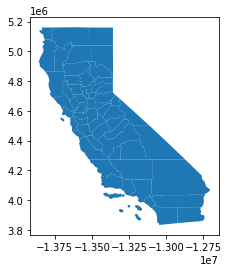

In [18]:
# Create a map of the CA counties
counties.plot();

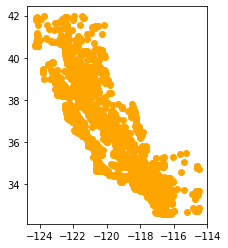

In [21]:
# Create a map of the GAMA wells
wells.plot(color = 'orange');

### Question 2.2 (1 pt)
Examine the plots of the counties and wells above. What do the values on the x- and y- axes of the two plots above represent? Why do `wells` and `counties` have different axes? Would the wells and counties overlap if we were to place them both on the same map?

*YOUR ANSWER HERE*

*Solution*

*The x- and y-axes represent positions within the coordinate reference system in which each dataset is defined. For example, for the `wells` data, it appears the x-axis represents longitude and the y-axis represents latitude. The two plots have different axes because the data use different coordinate reference systems to represent geographic location on a two-dimensional plane.*

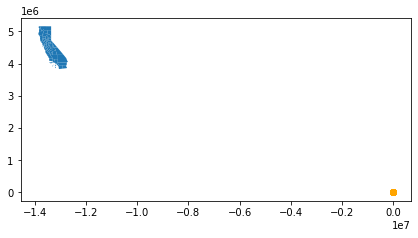

In [25]:
# SOLUTION scratch
fig, ax = plt.subplots(figsize=(7,7))
counties.plot(ax=ax)
wells.plot(ax= ax, color = 'orange');

### Geometries: Points, Linestrings and Polygons


A GeoPandas GeoSeries supports three basic types of vector geometries, in [Well-Known Text ](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry) format. In the examples below, the tuples contain point coordinates in two-dimensional space:
- **Points / MultiPoints**
    - POINT( -122 38)

    - MULTIPOINT((-122 38), (-123 39))
    
    
- **Lines / MultiLines***
    - LINE (30 10, 10 30, 40 40)
    
    - MULTILINE((10 10, 20 20, 10 40),(40 40, 30 30, 40 20, 30 10))
    
    
- **Polygons / MultiPolygons**
    - POLYGON ((35 10, 45 45, 15 40, 10 20, 35 10), (20 30, 35 35, 30 20, 20 30))
    - MULTIPOLYGON (((30 20, 45 40, 10 40, 30 20)), ((15 5, 40 10, 10 20, 5 10, 15 5)))

Notes:
- GeoPandas does not support raster geometries - check out the [Rasterio](https://rasterio.readthedocs.io/en/latest/) package for that.
- A GeoSeries can contain mixed geometry types but it's not a great idea.

(See https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects for extensive overview)


</br>



### Question 2.3 (1 pt)
What kind of geometry are the data in `wells`? What about `counties`? 

In [27]:
# YOUR CODE HERE

In [33]:
# SOLUTION
print(type(wells.iloc[0,-1]))
print(type(counties.iloc[0,-1]))
print(wells['geometry'].geom_type.unique())
print(counties['geometry'].geom_type.unique())

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>
['Point']
['Polygon' 'MultiPolygon']


### Coordinate reference systems

A **coordinate reference system (CRS)** determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html


In order to reduce distortion in maps we apply a map projection (math) to transform 3D geographic coordinates to 2D projected map coordinates.
<img src="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/image/projection.gif"></img>


The output of spatial measurements depend on the CRS and is expressed in the units of the CRS. 

## Defining and Transforming a CRS

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> you'll need a crs that has meter units (not degrees)
- plotting in a certain crs (e.g., to preserve area)

The process for transforming a CRS is:

1. Make sure a **crs** is defined for the geopandas dataframe by checking the **crs** property. 
2. If it is not set, you can **define** it.
3. Transform the coordinate geometry to a new CRS using the **to_crs** method.
- This returns a new geodataframe with the new coordinate values and CRS.
- You need to know what which CRS to use!!

A GeoDataFrame or GeoSeries has a `.crs` attribute which holds (optionally) a description of the coordinate reference system of the geometries. In our case, the crs is defined for both `wells` and `counties`, but the two datasets use different crs. 

In [34]:
print(wells.crs)
print(counties.crs)

epsg:4326
epsg:3857


What does **epsg:4326** mean? This is an [EPSG](http://www.epsg.org/) code for the geographic CRS known as the [World Geodectic System of 1984](https://en.wikipedia.org/wiki/World_Geodetic_System#WGS84), or `WGS84`. This is the most commonly used CRS for latitude and longitude coordinate data and is the default CRS for most mapping software when the data does not have a defined CRS.

The `counties` crs, epsg:3857, is known as "Pseudo-Mercator." You can read about it at the link above.

### Question 2.4 (1 pt)
So that we can better compare the `wells` and `counties` dataframes, let's transform the crs for `counties` data to epsg:4326. We can convert a GeoDataFrame to another reference system using the `to_crs` function. Make the transformation and save it to a new variable called `counties_wgs84`. You will need to decide if/how to specify the three parameters to `to_crs`.

In [ ]:
# YOUR CODE HERE
counties_wgs84 = ...

In [35]:
# SOLUTION
counties_wgs84 = counties.to_crs(epsg=4326)

In [37]:
assert counties_wgs84.crs == 'epsg:4326'

### Question 2.5 (1 pt)
Now that `counties` and `wells` are in the same coordinate reference system, we can (meaningfully) plot them on the same map. Run the code block below and make two "artistic" changes to the plot (for example, change the size or shape of the well markers or the weight of the county boundaries). 

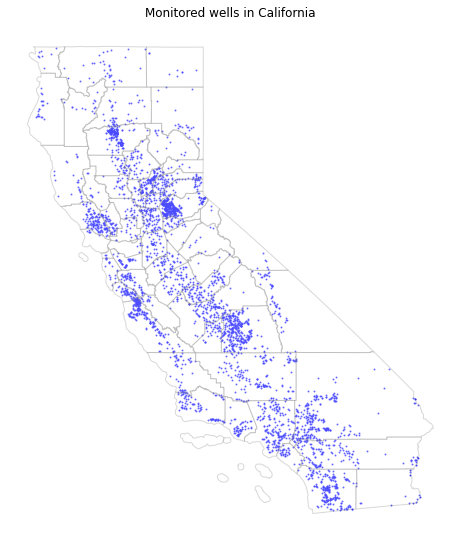

In [38]:
fig, ax = plt.subplots(figsize=(8,12))

wells.plot(ax=ax, color = 'blue', alpha = 0.7, markersize = 1)

counties_wgs84.plot(ax=ax, color = 'white', edgecolor='gray', alpha = 0.3)

ax.axis('off') # You can optionally omit the axes

# Show a title
ax.set_title('Monitored wells in California')

plt.show()

## Spatial relationships 

An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

<img src="images/TopologicSpatialRelations2.png"><br>
(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))

#### Spatial relationships functions overview

<ul>
  <li>`equals`</li>
  <li>`contains`</li>
  <li>`crosses`</li>
  <li>`disjoint`</li>
  <li>`intersects`</li>
  <li>`overlaps`</li>
  <li>`touches`</li>
  <li>`within`</li>
  <li>`covers`</li>
</ul>

<p>
See https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships for an overview of those methods.


We can use the built-in methods in Geopandas to evaluate the spatial relationships between individual objects.

For example, we can show that the first well (index 0) is located in Kern County. Note: we use `.squeeze()` here and elsewhere to to extract the geometry object when the GeoSeries only contains one entry.

In [39]:
# extract the first well (a Point object)
well0 = wells.loc[0,'geometry']

# extract the Kern county Polygon
kern = counties_wgs84.loc[counties['NAME']=='Kern','geometry'].squeeze()

# use the `contains` method to determine whether well0 is located within Kern
kern.contains(well0)

True

The same methods that are available on individual `shapely` geometries as we have seen above, are also available as methods on `GeoSeries` / `GeoDataFrame` objects.

For example, if we call the `contains` method on the `counties` dataframe with the `well0` point, Python check whether each county contains `well0`. We can then use the resulting series of Booleans to filter the dataframe.

In [40]:
well0_counties = counties_wgs84.contains(well0) # print this if you're not sure what form the output will take
counties_wgs84[well0_counties]

,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
32,029,02054176,06029,Kern,Kern County,06,H1,G4020,None,12540,None,A,21061589620,79574760,+35.3466288,-118.7295064,"POLYGON ((-119.91367 35.43927, -119.92328 35.4..."


### Question 2.6 (1 pt)
Filter `wells` to show only those wells that are located `within` Fresno county.

In [41]:
# YOUR CODE HERE

...

fresno_wells = ...

In [42]:
# SOLUTION
fresno = counties_wgs84.loc[counties_wgs84['NAME']=='Fresno','geometry'].squeeze()
fresno_wells = wells[wells.within(fresno)]

In [43]:
assert len(fresno_wells)==120

## Question 3: Merging data
For this question, we want to use the method [`.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to merge `fresno_wells` and `measurements`.<br>

When you use `.merge()`, there are a few parameters that you'll have to set. The `DataFrame` in `DataFrame.merge()` is considered your left dataframe, or the set of data that will show up on the left side of your merged dataframe. The `right` field will contain your right dataframe (the set of data that will show up on the right side of your merged dataframe).<br>

Two of the key fields that you'll have to fill out are `on = ` (the common field that both tables should be matched on when  you merge) and ` how = ` (the type of merge that you want to perform).<br>
A visual of the different types of merges is shown below ([source](http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/)).<br>

<img src="images/joins.png"><br>
An inner merge retains only the records that both tables have in common, an outer merge keeps all records from both tables and fills in `NaN` values for non-overlapping records, and a right merge and a left merge keep all the records from the right or left table, respectively, filling in `NaN` if a particular record is not found in the other table.

### Question 3.1 (1 pt)
If we want to link the well measurements in `measurement` to the well characteristics in `fresno_wells`, what field do we want to use for `on = `?

*YOUR ANSWER HERE*

*SOLUTION*

*We want to merge on "WELL_ID", which will allow us to link measurements to well characteristics.*

### Question 3.2 (1 pt)
Which type of merge (inner, outer, left, right) should we use to merge the `measurements` and `fresno_wells` data? Why?

In [70]:
# use this cell for scratch work

*YOUR ANSWER HERE*

In [71]:
# SOLUTION scratch work
print(measurements.merge(fresno_wells, on = "WELL_ID", how = "right").shape)
print(measurements.merge(fresno_wells, on = 'WELL_ID', how = 'left').shape)
print(measurements.merge(fresno_wells, on = 'WELL_ID', how = 'inner').shape)
print(measurements.merge(fresno_wells, on = 'WELL_ID', how = 'outer').shape)

(16058, 18)
(522615, 18)
(16058, 18)
(522615, 18)


*SOLUTION*

*An "inner" merge would definitely work because it would retain only those wells in Fresno with measurement data. "Outer" would not work because it would give us records for all wells, not just those in Fresno. Depending on how you structure the function, in this case, a "right" or "left" merge could also work, in the former case if fresno_wells were on the right (`measurements.merge(fresno_wells...`) and in the latter if fresno_wells were on the left (`fresno_wells.merge(measurements...`). This is true because all of the wells in `fresno_wells` are also in `measurements`.*

### Question 3.3 (1 pt)
Merge `measurements` and `fresno_wells`, keeping `measurements` as the left dataframe. Save the merged dataframe to `measurements_wells`.

In [72]:
# YOUR CODE HERE
measurements_wells = measurements.merge(fresno_wells, on = "WELL_ID", how = "inner")

In [73]:
measurements_wells.head()

,WELL_ID,RESULTS,CHEMICAL,DATE,UNITS,QUALIFER,RL,RL_float,RL_clean,RL_CLEAN,WELL_TYPE,WELL_DEPTH,TOP_OF_SCR,SCREEN_LEN,SOURCE,SOURCE_NAM,OTHER_NAME,geometry
0,MADCHOW-04,104.400,C-14,4/16/2008,PCT MODERN,NaN,UNK,NaN,NaN,NaN,MUNICIPAL,480.0,180.0,290.0,USGS,MADCHOW-04,MADCHOW-04,POINT (-119.82481 36.84489)
1,MADCHOW-04,3.990,CL,4/16/2008,MG/L,NaN,0.12,0.12,0.12,NaN,MUNICIPAL,480.0,180.0,290.0,USGS,MADCHOW-04,MADCHOW-04,POINT (-119.82481 36.84489)
2,MADCHOW-04,0.040,CLBZME4,4/16/2008,UG/L,<,0.04,0.04,0.04,NaN,MUNICIPAL,480.0,180.0,290.0,USGS,MADCHOW-04,MADCHOW-04,POINT (-119.82481 36.84489)
3,MADCHOW-04,0.001,CU,4/16/2008,MG/L,<,1,1,1.00,NaN,MUNICIPAL,480.0,180.0,290.0,USGS,MADCHOW-04,MADCHOW-04,POINT (-119.82481 36.84489)
4,MADCHOW-04,0.040,DCA11,4/16/2008,UG/L,<,0.04,0.04,0.04,NaN,MUNICIPAL,480.0,180.0,290.0,USGS,MADCHOW-04,MADCHOW-04,POINT (-119.82481 36.84489)


# Hooray, you're done! 

Please remember to submit your lab work, after running all cells, in .pdf and .ipynb format on bCourses.

Credits: the Geopandas section of this notebook was adapted from content developed by UC Berkeley's D-Lab and Sergio Rey's tutorials. 